
Measurement Results: {'00101': 31, '10100': 28, '11101': 34, '01001': 28, '01101': 42, '00111': 27, '00010': 33, '10011': 27, '10010': 32, '01111': 26, '11010': 32, '10001': 38, '11111': 34, '01000': 30, '10111': 33, '11110': 28, '01110': 40, '00000': 36, '00100': 33, '01100': 25, '11000': 32, '01010': 29, '10101': 35, '00001': 31, '10110': 25, '00110': 35, '11001': 32, '00011': 32, '10000': 32, '11011': 34, '01011': 41, '11100': 29}


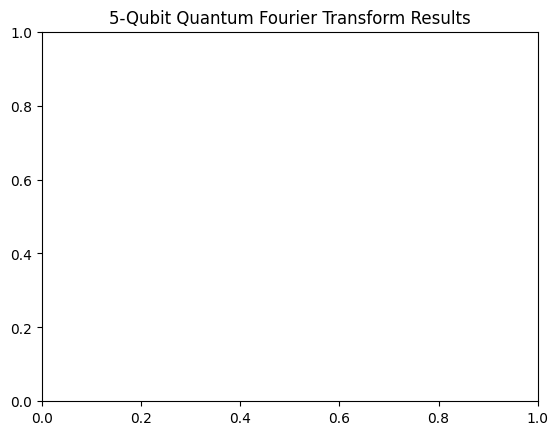

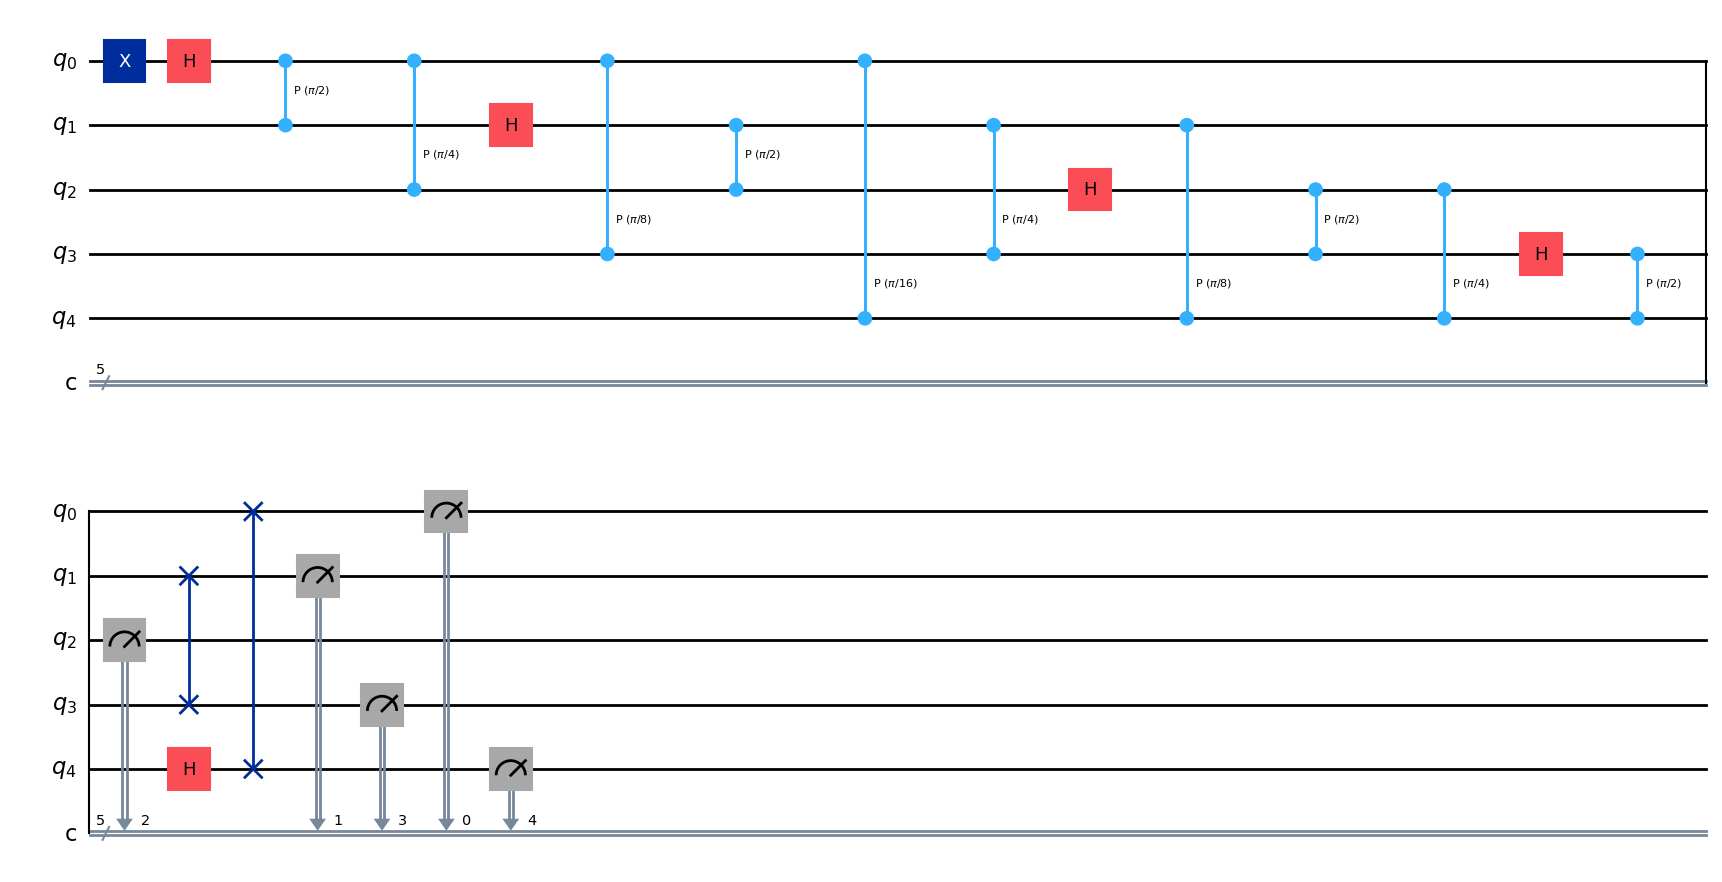

In [1]:
# Import required libraries
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

# Function to add Quantum Fourier Transform gates to a circuit
def qft(circuit, n):
    """Apply the Quantum Fourier Transform to n qubits in the circuit."""
    for j in range(n):
        # Step 1: Apply Hadamard gate
        circuit.h(j)
        # Step 2: Apply controlled phase rotations
        for k in range(j+1, n):
            angle = np.pi / (2 ** (k - j))
            circuit.cp(angle, k, j)  # Controlled phase rotation

    # Step 3: Swap qubits to reverse order
    for i in range(n // 2):
        circuit.swap(i, n - i - 1)

    return circuit

# Create a 5-qubit quantum circuit with 5 classical bits for measurement
n = 5
qc = QuantumCircuit(n, n)

# Initialize qubits to |1⟩ state for testing (optional)
qc.x(0)

# Apply Quantum Fourier Transform
qft(qc, n)

# Measure all qubits
qc.measure(range(n), range(n))

# Use Aer simulator backend
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)

# Execute the circuit
result = simulator.run(compiled_circuit, shots=1024).result()

# Get measurement results
counts = result.get_counts()

# Print results
print("\nMeasurement Results:", counts)

# Plot histogram
plot_histogram(counts)
plt.title("5-Qubit Quantum Fourier Transform Results")
plt.show()

# Draw the QFT circuit
qc.draw('mpl')
